In [4106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
import re

In [4107]:
df = pd.read_csv('data.csv')

In [4108]:
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920,1080,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920,1080,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920,1080,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240,1400,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560,1600,Mac OS,1


In [4109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    int64  
 15  resolution_height  893 non-null    int64  
 16  OS                 893 non

In [4110]:
df.duplicated().sum()

np.int64(0)

In [4111]:
df.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

In [4112]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [4113]:
len(df['brand'].unique())

30

In [4114]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Laptop_Brand'] = encoder.fit_transform(df['brand'])
df.drop('brand',axis=1,inplace=True)
df

,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,Laptop_Brand
0,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920,1080,Windows 11 OS,1,9
1,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920,1080,Windows 11 OS,1,9
2,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920,1080,Windows 11 OS,1,1
3,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240,1400,Windows 11 OS,1,14
4,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560,1600,Mac OS,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920,1080,Windows 11 OS,1,3
889,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560,1440,Windows 11 OS,1,3
890,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560,1600,Windows 11 OS,1,3
891,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920,1080,Windows 11 OS,1,3


In [4115]:
df.drop(columns=['name'],axis=1,inplace=True)

<Axes: xlabel='price', ylabel='Count'>

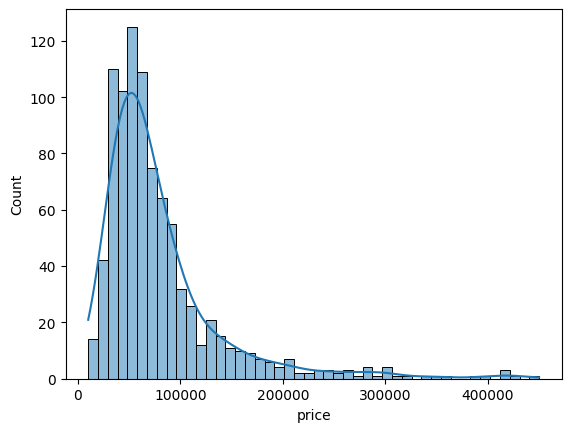

In [4116]:
sns.histplot(data=df,x='price',kde=True)

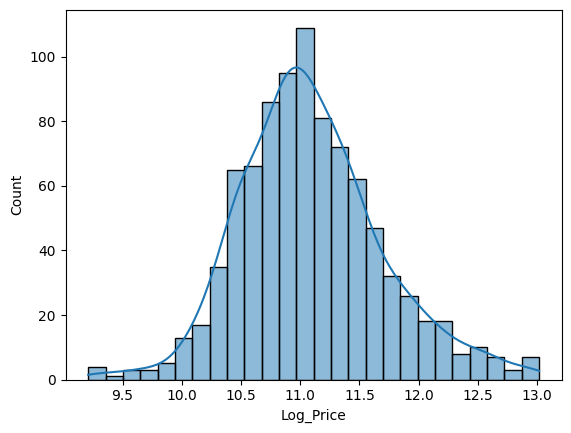

In [4117]:
df['Log_Price'] = df['price'].apply(np.log)
sns.histplot(data=df,x='Log_Price',kde=True)
plt.show()

In [4118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Scaled_Price'] = scaler.fit_transform(df[['Log_Price']])


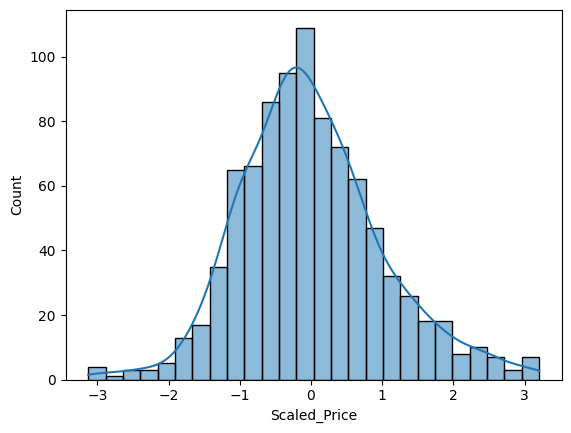

In [4119]:
sns.histplot(data=df,x='Scaled_Price',kde=True)
plt.show()

In [4120]:
from sklearn.preprocessing import OrdinalEncoder
ram_sizes = ['2GB','4GB','8GB','12GB','16GB','32GB','64GB']
oe = OrdinalEncoder(categories=[ram_sizes])
df['Encoded_Ram_Sizes'] = oe.fit_transform(df[['Ram']])

In [4121]:
ram_types = ['Unified','LPDDR5X','DDR5','LPDDR5','DDR4','DDR4-','LPDDR4x','LPDDR4','DDR3','DDR']
ram_types = [s.lower() for s in ram_types]
ram_types.reverse()
df['Ram_type'] = [s.lower() for s in df['Ram_type']]
oe = OrdinalEncoder(categories=[ram_types])
df['Encoded_Ram_Types'] = oe.fit_transform(df[['Ram_type']])

In [4122]:
df.drop(columns=['price','Log_Price','Ram','Ram_type'],axis=1,inplace=True)
df

,spec_rating,processor,CPU,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920,1080,Windows 11 OS,1,9,-0.454550,2.0,5.0
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",512GB,SSD,Intel UHD Graphics,15.6,1920,1080,Windows 11 OS,1,9,-0.826656,2.0,5.0
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",512GB,SSD,Intel Iris Xe Graphics,14.0,1920,1080,Windows 11 OS,1,1,-1.477061,2.0,5.0
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",512GB,SSD,Intel Integrated Iris Xe,14.0,2240,1400,Windows 11 OS,1,14,-0.155400,4.0,6.0
4,69.323529,Apple M1,Octa Core (4P + 4E),256GB,SSD,Apple M1 Integrated Graphics,13.3,2560,1600,Mac OS,1,2,0.108374,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",512GB,SSD,Integrated Intel UHD Graphics,15.6,1920,1080,Windows 11 OS,1,3,-0.626890,2.0,5.0
889,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560,1440,Windows 11 OS,1,3,0.860635,4.0,0.0
890,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560,1600,Windows 11 OS,1,3,1.769901,5.0,7.0
891,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920,1080,Windows 11 OS,1,3,1.138456,4.0,5.0


In [4123]:
df['ROM'].unique()
rom_sizes = ['32GB','64GB','128GB','256GB','512GB','1TB','2TB']
oe = OrdinalEncoder(categories=[rom_sizes])
df['Encoded_Rom_Sizes'] = oe.fit_transform(df[['ROM']])
df.drop(columns=['ROM'],axis=1,inplace=True)


In [4124]:
df['ROM_type'].unique()
rom_types = ['Hard-Disk','SSD']
oe = OrdinalEncoder(categories=[rom_types])
df['Encoded_Rom_Types'] = oe.fit_transform(df[['ROM_type']])
df.drop(columns=['ROM_type'],axis=1,inplace=True)

In [4125]:
test = df['resolution_width'] / df['resolution_height'] + df['resolution_height']
test.unique()
len(test.unique())


30

In [4126]:
test1 = pd.DataFrame(df[['resolution_width','resolution_height']]).drop_duplicates()
len(test1)

30

In [4127]:
monitor_features = df[['display_size','resolution_width','resolution_height']]
monitor_features

,display_size,resolution_width,resolution_height
0,15.6,1920,1080
1,15.6,1920,1080
2,14.0,1920,1080
3,14.0,2240,1400
4,13.3,2560,1600
...,...,...,...
888,15.6,1920,1080
889,15.6,2560,1440
890,14.0,2560,1600
891,15.6,1920,1080


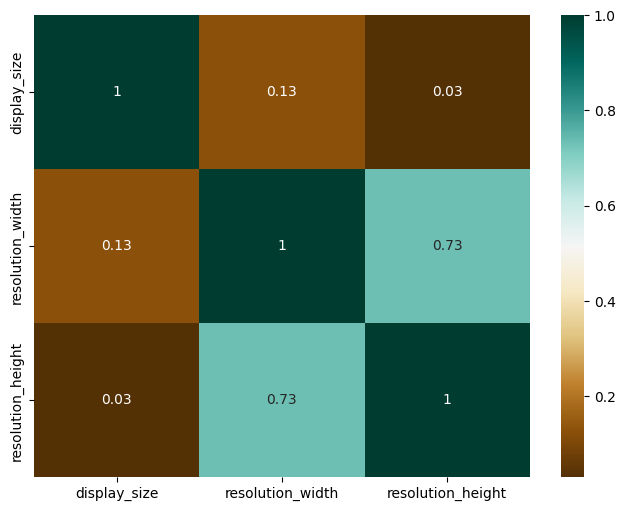

In [4128]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(monitor_features.corr(), annot=True, cmap='BrBG')
plt.show()

In [4129]:
df['Aspect_Ratio'] = df['resolution_width'] / df['resolution_height'] + df['resolution_height']
df.drop(columns=['resolution_width','resolution_height'],axis=1,inplace=True)

In [4130]:
df

,spec_rating,processor,CPU,GPU,display_size,OS,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",4GB AMD Radeon RX 6500M,15.6,Windows 11 OS,1,9,-0.454550,2.0,5.0,4.0,1.0,1081.777778
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",Intel UHD Graphics,15.6,Windows 11 OS,1,9,-0.826656,2.0,5.0,4.0,1.0,1081.777778
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",Intel Iris Xe Graphics,14.0,Windows 11 OS,1,1,-1.477061,2.0,5.0,4.0,1.0,1081.777778
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",Intel Integrated Iris Xe,14.0,Windows 11 OS,1,14,-0.155400,4.0,6.0,4.0,1.0,1401.600000
4,69.323529,Apple M1,Octa Core (4P + 4E),Apple M1 Integrated Graphics,13.3,Mac OS,1,2,0.108374,2.0,5.0,3.0,1.0,1601.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",Integrated Intel UHD Graphics,15.6,Windows 11 OS,1,3,-0.626890,2.0,5.0,4.0,1.0,1081.777778
889,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",6GB NVIDIA GeForce RTX 3060,15.6,Windows 11 OS,1,3,0.860635,4.0,0.0,5.0,1.0,1441.777778
890,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",8GB NVIDIA GeForce RTX 4060,14.0,Windows 11 OS,1,3,1.769901,5.0,7.0,5.0,1.0,1601.600000
891,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",6GB NVIDIA GeForce RTX 4050,15.6,Windows 11 OS,1,3,1.138456,4.0,5.0,4.0,1.0,1081.777778


In [4131]:
#Extracting Vram off GPU column
df['VRAM'] = df['GPU'].str.extract(r'(\d+)GB', expand=False)

In [4132]:
#If no vram is found then its an integrated card which doesn't have vram
df.fillna(0,inplace=True)

In [4133]:
#Vram is an object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   spec_rating        893 non-null    float64
 1   processor          893 non-null    object 
 2   CPU                893 non-null    object 
 3   GPU                893 non-null    object 
 4   display_size       893 non-null    float64
 5   OS                 893 non-null    object 
 6   warranty           893 non-null    int64  
 7   Laptop_Brand       893 non-null    int64  
 8   Scaled_Price       893 non-null    float64
 9   Encoded_Ram_Sizes  893 non-null    float64
 10  Encoded_Ram_Types  893 non-null    float64
 11  Encoded_Rom_Sizes  893 non-null    float64
 12  Encoded_Rom_Types  893 non-null    float64
 13  Aspect_Ratio       893 non-null    float64
 14  VRAM               893 non-null    object 
dtypes: float64(8), int64(2), object(5)
memory usage: 104.8+ KB


In [4134]:
df['VRAM'] = df['VRAM'].astype(np.int32)

In [4135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   spec_rating        893 non-null    float64
 1   processor          893 non-null    object 
 2   CPU                893 non-null    object 
 3   GPU                893 non-null    object 
 4   display_size       893 non-null    float64
 5   OS                 893 non-null    object 
 6   warranty           893 non-null    int64  
 7   Laptop_Brand       893 non-null    int64  
 8   Scaled_Price       893 non-null    float64
 9   Encoded_Ram_Sizes  893 non-null    float64
 10  Encoded_Ram_Types  893 non-null    float64
 11  Encoded_Rom_Sizes  893 non-null    float64
 12  Encoded_Rom_Types  893 non-null    float64
 13  Aspect_Ratio       893 non-null    float64
 14  VRAM               893 non-null    int32  
dtypes: float64(8), int32(1), int64(2), object(4)
memory usage: 101.3+ KB


In [4136]:
df

,spec_rating,processor,CPU,GPU,display_size,OS,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",4GB AMD Radeon RX 6500M,15.6,Windows 11 OS,1,9,-0.454550,2.0,5.0,4.0,1.0,1081.777778,4
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",Intel UHD Graphics,15.6,Windows 11 OS,1,9,-0.826656,2.0,5.0,4.0,1.0,1081.777778,0
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",Intel Iris Xe Graphics,14.0,Windows 11 OS,1,1,-1.477061,2.0,5.0,4.0,1.0,1081.777778,0
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",Intel Integrated Iris Xe,14.0,Windows 11 OS,1,14,-0.155400,4.0,6.0,4.0,1.0,1401.600000,0
4,69.323529,Apple M1,Octa Core (4P + 4E),Apple M1 Integrated Graphics,13.3,Mac OS,1,2,0.108374,2.0,5.0,3.0,1.0,1601.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",Integrated Intel UHD Graphics,15.6,Windows 11 OS,1,3,-0.626890,2.0,5.0,4.0,1.0,1081.777778,0
889,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",6GB NVIDIA GeForce RTX 3060,15.6,Windows 11 OS,1,3,0.860635,4.0,0.0,5.0,1.0,1441.777778,6
890,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",8GB NVIDIA GeForce RTX 4060,14.0,Windows 11 OS,1,3,1.769901,5.0,7.0,5.0,1.0,1601.600000,8
891,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",6GB NVIDIA GeForce RTX 4050,15.6,Windows 11 OS,1,3,1.138456,4.0,5.0,4.0,1.0,1081.777778,6


In [4137]:
processor = ['intel', 'amd', 'apple', 'arm', 'nvidia']
pattern = '|'.join(processor)
# Extract processor names from the 'GPU' column
df['GPU_Manufacturer'] = df['GPU'].str.extract(f'({pattern})', flags=re.IGNORECASE, expand=False).astype("string")
df

,spec_rating,processor,CPU,GPU,display_size,OS,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,GPU_Manufacturer
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",4GB AMD Radeon RX 6500M,15.6,Windows 11 OS,1,9,-0.454550,2.0,5.0,4.0,1.0,1081.777778,4,AMD
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",Intel UHD Graphics,15.6,Windows 11 OS,1,9,-0.826656,2.0,5.0,4.0,1.0,1081.777778,0,Intel
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",Intel Iris Xe Graphics,14.0,Windows 11 OS,1,1,-1.477061,2.0,5.0,4.0,1.0,1081.777778,0,Intel
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",Intel Integrated Iris Xe,14.0,Windows 11 OS,1,14,-0.155400,4.0,6.0,4.0,1.0,1401.600000,0,Intel
4,69.323529,Apple M1,Octa Core (4P + 4E),Apple M1 Integrated Graphics,13.3,Mac OS,1,2,0.108374,2.0,5.0,3.0,1.0,1601.600000,0,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",Integrated Intel UHD Graphics,15.6,Windows 11 OS,1,3,-0.626890,2.0,5.0,4.0,1.0,1081.777778,0,Intel
889,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",6GB NVIDIA GeForce RTX 3060,15.6,Windows 11 OS,1,3,0.860635,4.0,0.0,5.0,1.0,1441.777778,6,NVIDIA
890,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",8GB NVIDIA GeForce RTX 4060,14.0,Windows 11 OS,1,3,1.769901,5.0,7.0,5.0,1.0,1601.600000,8,NVIDIA
891,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",6GB NVIDIA GeForce RTX 4050,15.6,Windows 11 OS,1,3,1.138456,4.0,5.0,4.0,1.0,1081.777778,6,NVIDIA


In [4138]:
df['GPU_Manufacturer'].fillna("Other",inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6536\664153101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GPU_Manufacturer'].fillna("Other",inplace=True)


In [4139]:
df['GPU_Manufacturer'] = [s.lower() for s in df['GPU_Manufacturer']]

In [4140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   spec_rating        893 non-null    float64
 1   processor          893 non-null    object 
 2   CPU                893 non-null    object 
 3   GPU                893 non-null    object 
 4   display_size       893 non-null    float64
 5   OS                 893 non-null    object 
 6   warranty           893 non-null    int64  
 7   Laptop_Brand       893 non-null    int64  
 8   Scaled_Price       893 non-null    float64
 9   Encoded_Ram_Sizes  893 non-null    float64
 10  Encoded_Ram_Types  893 non-null    float64
 11  Encoded_Rom_Sizes  893 non-null    float64
 12  Encoded_Rom_Types  893 non-null    float64
 13  Aspect_Ratio       893 non-null    float64
 14  VRAM               893 non-null    int32  
 15  GPU_Manufacturer   893 non-null    object 
dtypes: float64(8), int32(1), i

In [4141]:
df['GPU_Manufacturer'].unique()

array(['amd', 'intel', 'apple', 'nvidia', 'arm', 'other'], dtype=object)

In [4142]:
labels = df['GPU_Manufacturer']
encoder = LabelEncoder()
df['Encoded_GPU_Manufacturer'] = encoder.fit_transform(labels)
df.drop(columns=['GPU_Manufacturer','GPU'],axis=1,inplace=True)
df


,spec_rating,processor,CPU,display_size,OS,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",15.6,Windows 11 OS,1,9,-0.454550,2.0,5.0,4.0,1.0,1081.777778,4,0
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",15.6,Windows 11 OS,1,9,-0.826656,2.0,5.0,4.0,1.0,1081.777778,0,3
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",14.0,Windows 11 OS,1,1,-1.477061,2.0,5.0,4.0,1.0,1081.777778,0,3
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",14.0,Windows 11 OS,1,14,-0.155400,4.0,6.0,4.0,1.0,1401.600000,0,3
4,69.323529,Apple M1,Octa Core (4P + 4E),13.3,Mac OS,1,2,0.108374,2.0,5.0,3.0,1.0,1601.600000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",15.6,Windows 11 OS,1,3,-0.626890,2.0,5.0,4.0,1.0,1081.777778,0,3
889,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",15.6,Windows 11 OS,1,3,0.860635,4.0,0.0,5.0,1.0,1441.777778,6,4
890,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",14.0,Windows 11 OS,1,3,1.769901,5.0,7.0,5.0,1.0,1601.600000,8,4
891,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",15.6,Windows 11 OS,1,3,1.138456,4.0,5.0,4.0,1.0,1081.777778,6,4


In [4143]:
df['OS'].unique()

array(['Windows 11 OS', 'Mac OS', 'Android 11 OS', 'DOS OS',
       'Windows 10 OS', 'Windows 10  OS', 'Chrome OS', 'Windows OS',
       'Ubuntu OS', 'Mac Catalina OS', 'DOS 3.0 OS', 'Windows 11  OS',
       'Mac High Sierra OS', 'Mac 10.15.3\t OS'], dtype=object)

In [4144]:
def getOsManufacturer(OS):
    if 'windows' in OS.lower():
        return 0
    elif 'mac' in OS.lower():
        return 1
    elif 'ubuntu' in OS.lower():
        return 2
    else:
        return 3
    
def getOsVersion(OS):
    match = re.search(r'(\d+)', OS)
    if match:
        return match.group(1)
    return 1
df['OS_Manufacturer'] = df['OS'].apply(getOsManufacturer)
df['OS_Version'] = df['OS'].apply(getOsVersion)
df.drop('OS',axis=1,inplace=True)

In [4145]:
df.head(20)

,spec_rating,processor,CPU,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",15.6,1,9,-0.454550,2.0,5.0,4.0,1.0,1081.777778,4,0,0,11
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",15.6,1,9,-0.826656,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",14.0,1,1,-1.477061,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",14.0,1,14,-0.155400,4.0,6.0,4.0,1.0,1401.600000,0,3,0,11
4,69.323529,Apple M1,Octa Core (4P + 4E),13.3,1,2,0.108374,2.0,5.0,3.0,1.0,1601.600000,0,1,1,1
5,62.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",14.0,1,1,-0.822907,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
6,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",15.6,1,6,-0.961676,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
7,63.000000,13th Gen Intel Core i5 13420H,"Octa Core (4P + 4E), 12 Threads",15.6,1,1,0.266975,4.0,7.0,4.0,1.0,1081.777778,6,4,0,11
8,64.000000,12th Gen Intel Core i5 12500H,"12 Cores (4P + 8E), 16 Threads",15.6,1,3,-0.485173,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
9,68.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",13.3,1,21,0.223182,4.0,6.0,4.0,1.0,1920.562500,0,3,0,11


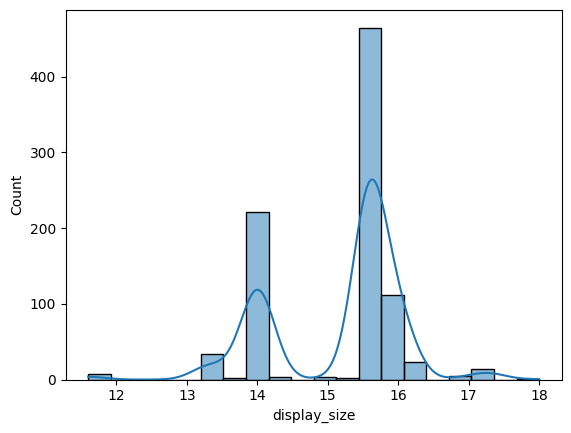

In [4146]:
sns.histplot(df['display_size'], kde=True) 
plt.show()

In [4147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['display_size'] = scaler.fit_transform(df[['display_size']])
df

,spec_rating,processor,CPU,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",0.625000,1,9,-0.454550,2.0,5.0,4.0,1.0,1081.777778,4,0,0,11
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",0.625000,1,9,-0.826656,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",0.375000,1,1,-1.477061,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",0.375000,1,14,-0.155400,4.0,6.0,4.0,1.0,1401.600000,0,3,0,11
4,69.323529,Apple M1,Octa Core (4P + 4E),0.265625,1,2,0.108374,2.0,5.0,3.0,1.0,1601.600000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",0.625000,1,3,-0.626890,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
889,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",0.625000,1,3,0.860635,4.0,0.0,5.0,1.0,1441.777778,6,4,0,11
890,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",0.375000,1,3,1.769901,5.0,7.0,5.0,1.0,1601.600000,8,4,0,11
891,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",0.625000,1,3,1.138456,4.0,5.0,4.0,1.0,1081.777778,6,4,0,11


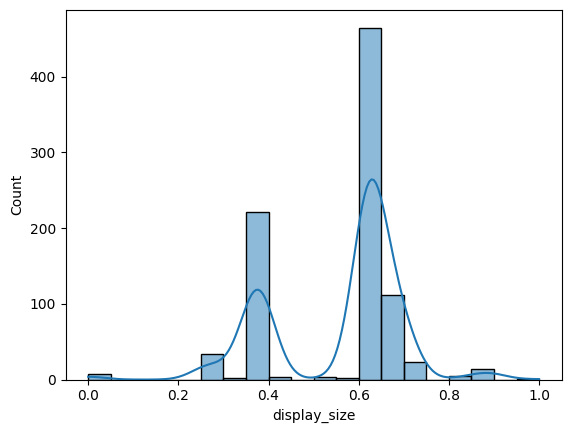

In [4148]:
sns.histplot(df['display_size'], kde=True) 
plt.show()

In [4149]:
df.head(20)

,spec_rating,processor,CPU,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",0.625000,1,9,-0.454550,2.0,5.0,4.0,1.0,1081.777778,4,0,0,11
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",0.625000,1,9,-0.826656,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",0.375000,1,1,-1.477061,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",0.375000,1,14,-0.155400,4.0,6.0,4.0,1.0,1401.600000,0,3,0,11
4,69.323529,Apple M1,Octa Core (4P + 4E),0.265625,1,2,0.108374,2.0,5.0,3.0,1.0,1601.600000,0,1,1,1
5,62.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",0.375000,1,1,-0.822907,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
6,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",0.625000,1,6,-0.961676,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
7,63.000000,13th Gen Intel Core i5 13420H,"Octa Core (4P + 4E), 12 Threads",0.625000,1,1,0.266975,4.0,7.0,4.0,1.0,1081.777778,6,4,0,11
8,64.000000,12th Gen Intel Core i5 12500H,"12 Cores (4P + 8E), 16 Threads",0.625000,1,3,-0.485173,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
9,68.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",0.265625,1,21,0.223182,4.0,6.0,4.0,1.0,1920.562500,0,3,0,11


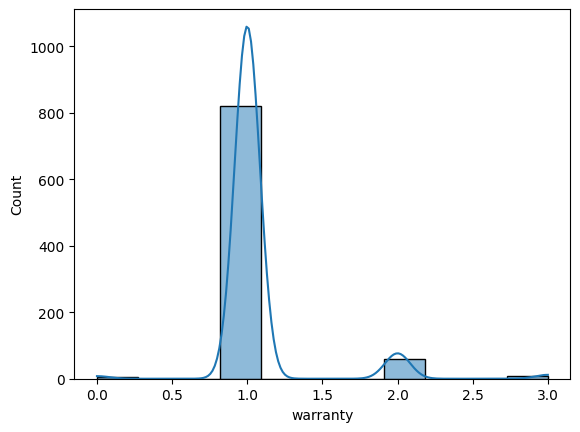

In [4150]:
sns.histplot(df['warranty'], kde=True) 
plt.show()

In [4151]:
df['warranty'] = scaler.fit_transform(df[['warranty']])
df

,spec_rating,processor,CPU,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",0.625000,0.333333,9,-0.454550,2.0,5.0,4.0,1.0,1081.777778,4,0,0,11
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",0.625000,0.333333,9,-0.826656,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",0.375000,0.333333,1,-1.477061,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",0.375000,0.333333,14,-0.155400,4.0,6.0,4.0,1.0,1401.600000,0,3,0,11
4,69.323529,Apple M1,Octa Core (4P + 4E),0.265625,0.333333,2,0.108374,2.0,5.0,3.0,1.0,1601.600000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",0.625000,0.333333,3,-0.626890,2.0,5.0,4.0,1.0,1081.777778,0,3,0,11
889,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",0.625000,0.333333,3,0.860635,4.0,0.0,5.0,1.0,1441.777778,6,4,0,11
890,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",0.375000,0.333333,3,1.769901,5.0,7.0,5.0,1.0,1601.600000,8,4,0,11
891,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",0.625000,0.333333,3,1.138456,4.0,5.0,4.0,1.0,1081.777778,6,4,0,11


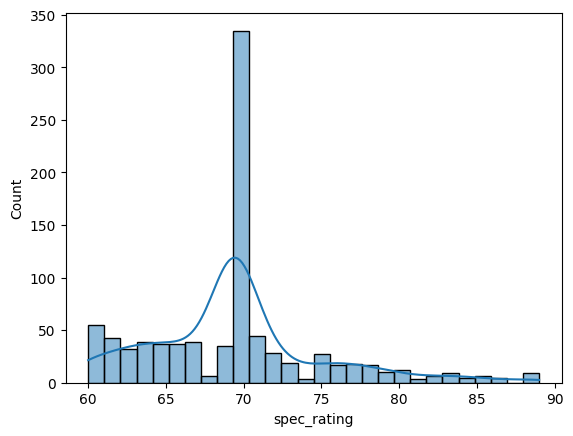

In [4152]:
sns.histplot(df['spec_rating'], kde=True) 
plt.show()

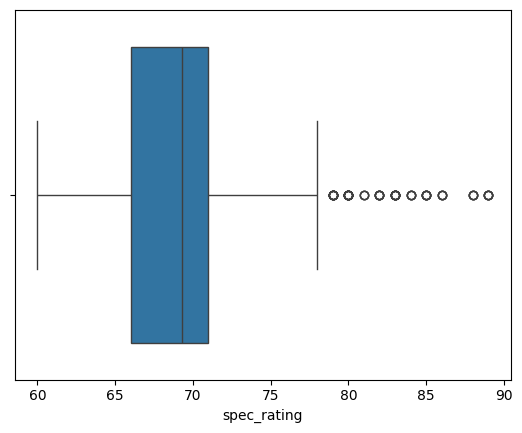

In [4153]:
sns.boxplot(df['spec_rating'],orient='h') 
plt.show()

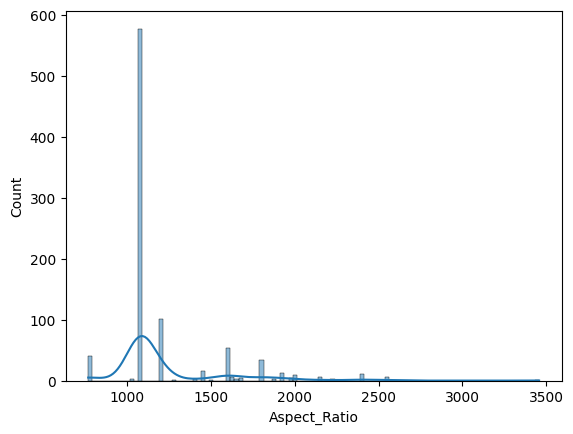

In [4154]:
sns.histplot(df['Aspect_Ratio'],kde=True)
plt.show()

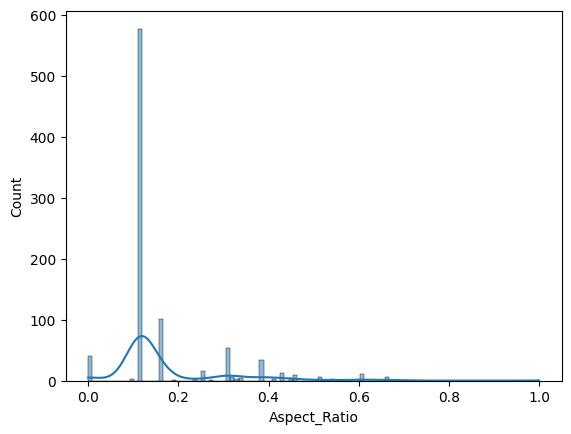

In [4155]:
df['Aspect_Ratio'] = scaler.fit_transform(df[['Aspect_Ratio']])
sns.histplot(df['Aspect_Ratio'],kde=True)
plt.show()

In [4156]:
df.head()

,spec_rating,processor,CPU,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",0.625000,0.333333,9,-0.454550,2.0,5.0,4.0,1.0,0.116121,4,0,0,11
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",0.625000,0.333333,9,-0.826656,2.0,5.0,4.0,1.0,0.116121,0,3,0,11
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",0.375000,0.333333,1,-1.477061,2.0,5.0,4.0,1.0,0.116121,0,3,0,11
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",0.375000,0.333333,14,-0.155400,4.0,6.0,4.0,1.0,0.235154,0,3,0,11
4,69.323529,Apple M1,Octa Core (4P + 4E),0.265625,0.333333,2,0.108374,2.0,5.0,3.0,1.0,0.309590,0,1,1,1


In [4157]:
# split_cols = df['processor'].str.split(' ', expand=True)
# df['generation'] = split_cols[0] + ' ' + split_cols[1]
def getProcessorGen(s):
    match = None
    gen_number = 1
    if 'intel' in s.lower():
        pattern = r"(\d+)(?:th)?\s+Gen\s+(Intel)\s+Core\s+i(\d)"
        match = re.search(pattern, s)
        if match:
            gen_number = match.group(1)

    elif 'amd' in s.lower():
        pattern = r"(\d+)(?:th)?\s+Gen\s+(AMD)\s+Ryzen\s+(\d)\s+(\d+H)"
        match = re.search(pattern, s)
        if match:
            gen_number = match.group(1)
        
    return gen_number




df['generation'] = df['processor'].apply(getProcessorGen)
# split_cols.loc[mask, 2] = split_cols.loc[mask, 0]
# split_cols.loc[mask, 3] = split_cols.loc[mask, 1]

# split_cols.loc[mask, 0] = None
# split_cols.loc[mask, 1] = None
# df['generation'] = split_cols[0]
# df['generation'] = df['generation'].replace('th', '', regex=True)
# df['generation'] = pd.to_numeric(df['generation'], errors='coerce').fillna(0).astype(int)

# df['series'] = split_cols[2] + ' ' + split_cols[3]
# df['model'] = split_cols[4] + ' ' + split_cols[5]
# df.drop(columns=['processor'], axis=1, inplace=True)
# df.head()
# split_cols

In [4158]:
def getProcessorCompany(s):
    match = None
    company_name = 'Other'
    if 'intel' in s.lower():
        pattern = r"(\d+)(?:th)?\s+Gen\s+(Intel)\s+Core\s+i(\d)"
        match = re.search(pattern, s)
        if match:
            company_name = match.group(2)

    elif 'amd' in s.lower():
        pattern = r"(\d+)(?:th)?\s+Gen\s+(AMD)\s+Ryzen\s+(\d)\s+(\d+H)"
        match = re.search(pattern, s)
        if match:
            company_name = match.group(2)

    elif 'apple' in s.lower():
        pattern = r"(Apple)\s+(M\d)"
        match = re.search(pattern, s)
        if match:
            company_name = match.group(1)
        
    elif 'mediatek' in s.lower():
        pattern = r"(MediaTek)\s+(MTK\d+)"
        match = re.search(pattern, s)
        if match:
            company_name = match.group(1)
    return company_name
df['CPU_Manufacturer'] = df['processor'].apply(getProcessorCompany)


In [4159]:
df['suffix_group'] = df['processor'].str.split().str[-1].str[-1]

In [4160]:
df.head(20)

,spec_rating,processor,CPU,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version,generation,CPU_Manufacturer,suffix_group
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",0.625000,0.333333,9,-0.454550,2.0,5.0,4.0,1.0,0.116121,4,0,0,11,5,AMD,H
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",0.625000,0.333333,9,-0.826656,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,12,Intel,U
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",0.375000,0.333333,1,-1.477061,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,11,Intel,4
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",0.375000,0.333333,14,-0.155400,4.0,6.0,4.0,1.0,0.235154,0,3,0,11,12,Intel,P
4,69.323529,Apple M1,Octa Core (4P + 4E),0.265625,0.333333,2,0.108374,2.0,5.0,3.0,1.0,0.309590,0,1,1,1,1,Apple,1
5,62.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",0.375000,0.333333,1,-0.822907,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,12,Intel,P
6,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",0.625000,0.333333,6,-0.961676,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,12,Intel,U
7,63.000000,13th Gen Intel Core i5 13420H,"Octa Core (4P + 4E), 12 Threads",0.625000,0.333333,1,0.266975,4.0,7.0,4.0,1.0,0.116121,6,4,0,11,13,Intel,H
8,64.000000,12th Gen Intel Core i5 12500H,"12 Cores (4P + 8E), 16 Threads",0.625000,0.333333,3,-0.485173,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,12,Intel,H
9,68.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",0.265625,0.333333,21,0.223182,4.0,6.0,4.0,1.0,0.428303,0,3,0,11,12,Intel,P


In [4161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   spec_rating               893 non-null    float64
 1   processor                 893 non-null    object 
 2   CPU                       893 non-null    object 
 3   display_size              893 non-null    float64
 4   warranty                  893 non-null    float64
 5   Laptop_Brand              893 non-null    int64  
 6   Scaled_Price              893 non-null    float64
 7   Encoded_Ram_Sizes         893 non-null    float64
 8   Encoded_Ram_Types         893 non-null    float64
 9   Encoded_Rom_Sizes         893 non-null    float64
 10  Encoded_Rom_Types         893 non-null    float64
 11  Aspect_Ratio              893 non-null    float64
 12  VRAM                      893 non-null    int32  
 13  Encoded_GPU_Manufacturer  893 non-null    int64  
 14  OS_Manufac

In [4162]:
for i, s in df['suffix_group'].items():
    if s in '0123456789':
        df.loc[i,'suffix_group']='1'
suffix_order = ['U', 'T', 'F', 'B', 'S', 'G', 'H', 'P', 'L', 'K', 'X', 'O', '1']
df['suffix_group'] = df['suffix_group'].astype("string")
df['suffix_group'] = df['suffix_group'].str.upper()
oe = OrdinalEncoder(categories=[suffix_order])
df['suffix_group'] = oe.fit_transform(df[['suffix_group']])
df.head()

,spec_rating,processor,CPU,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version,generation,CPU_Manufacturer,suffix_group
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",0.625000,0.333333,9,-0.454550,2.0,5.0,4.0,1.0,0.116121,4,0,0,11,5,AMD,6.0
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",0.625000,0.333333,9,-0.826656,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,12,Intel,0.0
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",0.375000,0.333333,1,-1.477061,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,11,Intel,12.0
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",0.375000,0.333333,14,-0.155400,4.0,6.0,4.0,1.0,0.235154,0,3,0,11,12,Intel,7.0
4,69.323529,Apple M1,Octa Core (4P + 4E),0.265625,0.333333,2,0.108374,2.0,5.0,3.0,1.0,0.309590,0,1,1,1,1,Apple,12.0


In [4163]:
labels = df['CPU_Manufacturer']
encoder = LabelEncoder()
df['CPU_Manufacturer'] = encoder.fit_transform(labels)
df.head()


,spec_rating,processor,CPU,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version,generation,CPU_Manufacturer,suffix_group
0,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",0.625000,0.333333,9,-0.454550,2.0,5.0,4.0,1.0,0.116121,4,0,0,11,5,0,6.0
1,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",0.625000,0.333333,9,-0.826656,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,12,2,0.0
2,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",0.375000,0.333333,1,-1.477061,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,11,2,12.0
3,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",0.375000,0.333333,14,-0.155400,4.0,6.0,4.0,1.0,0.235154,0,3,0,11,12,2,7.0
4,69.323529,Apple M1,Octa Core (4P + 4E),0.265625,0.333333,2,0.108374,2.0,5.0,3.0,1.0,0.309590,0,1,1,1,1,1,12.0


In [4164]:
df['generation'] = df['generation'].astype(np.int32)

In [4165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   spec_rating               893 non-null    float64
 1   processor                 893 non-null    object 
 2   CPU                       893 non-null    object 
 3   display_size              893 non-null    float64
 4   warranty                  893 non-null    float64
 5   Laptop_Brand              893 non-null    int64  
 6   Scaled_Price              893 non-null    float64
 7   Encoded_Ram_Sizes         893 non-null    float64
 8   Encoded_Ram_Types         893 non-null    float64
 9   Encoded_Rom_Sizes         893 non-null    float64
 10  Encoded_Rom_Types         893 non-null    float64
 11  Aspect_Ratio              893 non-null    float64
 12  VRAM                      893 non-null    int32  
 13  Encoded_GPU_Manufacturer  893 non-null    int64  
 14  OS_Manufac

In [4166]:
df.drop('processor',axis=1,inplace=True)

In [4167]:
import re

df[['cores','threads']] = df['CPU'].str.split(',', expand=True)
df['threads'] = df['threads'].str.replace('Threads', '', regex=True)

df['threads'] = df['threads'].fillna(0).astype(int)
def convert_cores(cores):
    core_mapping = {'octa': 8, 'Hexa': 6, 'Quad': 4, 'Dual': 2}
    for key, value in core_mapping.items():
        cores = re.sub(key, str(value), cores, flags=re.IGNORECASE)
    cores = re.sub(r' \D.*', '', cores)  # Remove non-digit characters after the first digit
    if cores.isdigit():
        return int(cores)
    return None
df['cores'] = df['cores'].apply(convert_cores) 
df

,spec_rating,CPU,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version,generation,CPU_Manufacturer,suffix_group,cores,threads
0,73.000000,"Hexa Core, 12 Threads",0.625000,0.333333,9,-0.454550,2.0,5.0,4.0,1.0,0.116121,4,0,0,11,5,0,6.0,6,12
1,60.000000,"Hexa Core (2P + 4E), 8 Threads",0.625000,0.333333,9,-0.826656,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,12,2,0.0,6,8
2,69.323529,"Dual Core, 4 Threads",0.375000,0.333333,1,-1.477061,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,11,2,12.0,2,4
3,66.000000,"12 Cores (4P + 8E), 16 Threads",0.375000,0.333333,14,-0.155400,4.0,6.0,4.0,1.0,0.235154,0,3,0,11,12,2,7.0,12,16
4,69.323529,Octa Core (4P + 4E),0.265625,0.333333,2,0.108374,2.0,5.0,3.0,1.0,0.309590,0,1,1,1,1,1,12.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,69.323529,"Hexa Core (2P + 4E), 8 Threads",0.625000,0.333333,3,-0.626890,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,1,4,0.0,6,8
889,71.000000,"Octa Core, 16 Threads",0.625000,0.333333,3,0.860635,4.0,0.0,5.0,1.0,0.250107,6,4,0,11,6,0,6.0,8,16
890,89.000000,"Octa Core, 16 Threads",0.375000,0.333333,3,1.769901,5.0,7.0,5.0,1.0,0.309590,8,4,0,11,7,0,4.0,8,16
891,73.000000,"14 Cores (6P + 8E), 20 Threads",0.625000,0.333333,3,1.138456,4.0,5.0,4.0,1.0,0.116121,6,4,0,11,13,2,6.0,14,20


In [4168]:
df['cores'].unique

<bound method Series.unique of 0       6
1       6
2       2
3      12
4       8
       ..
888     6
889     8
890     8
891    14
892     8
Name: cores, Length: 893, dtype: int64>

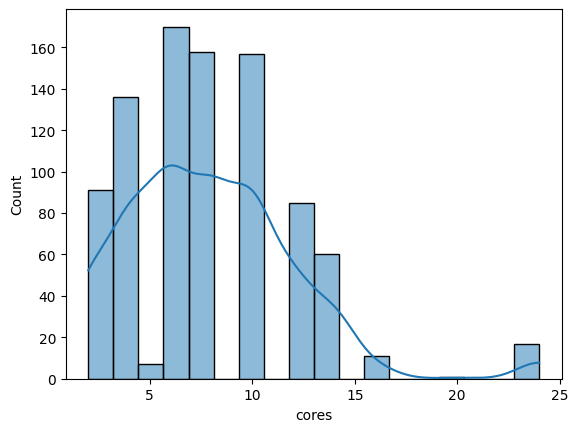

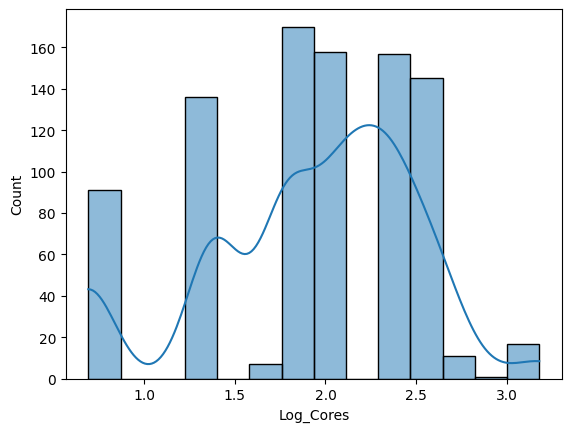

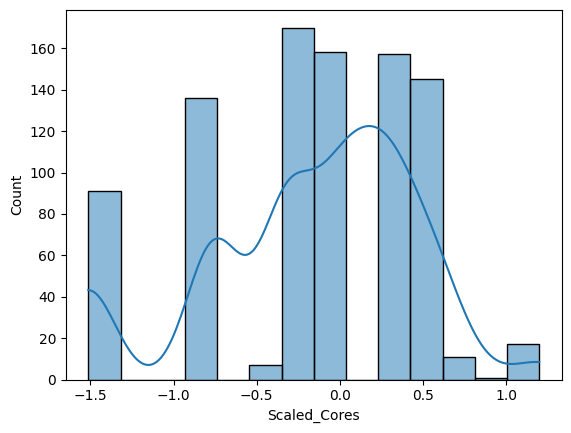

In [4169]:
sns.histplot(data=df,x='cores',kde=True)
plt.show()
df['Log_Cores'] = np.log(df['cores'])
sns.histplot(data=df, x='Log_Cores', kde=True)
plt.show()
scaler = RobustScaler()
df['Scaled_Cores'] = scaler.fit_transform(df[['Log_Cores']])
sns.histplot(data=df,x='Scaled_Cores',kde=True)
plt.show()

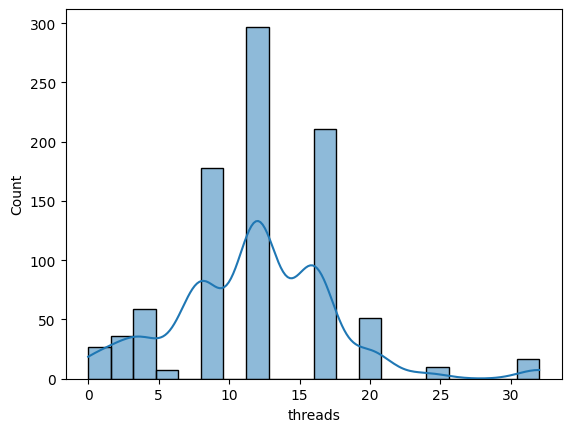

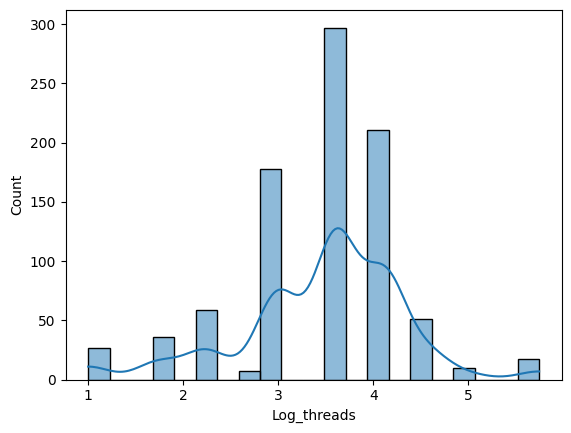

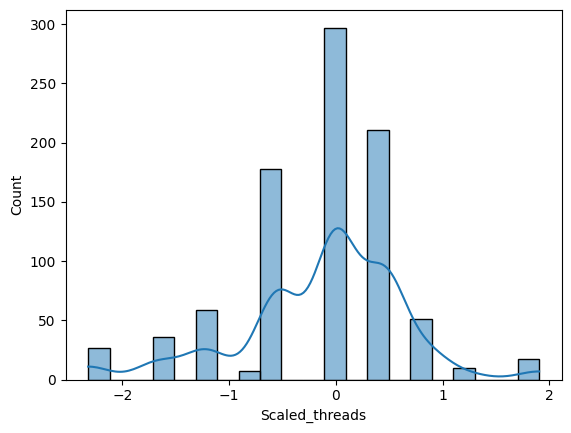

In [4170]:
sns.histplot(data=df,x='threads',kde=True)
plt.show()
df['Log_threads']=np.sqrt(df['threads']+1)
sns.histplot(data=df,x='Log_threads',kde=True)  
plt.show()
scaler = RobustScaler()
df['Scaled_threads'] = scaler.fit_transform(df[['Log_threads']])
sns.histplot(data=df, x='Scaled_threads', kde=True)
plt.show()

In [4171]:
df.drop(columns=['CPU','cores','threads','Log_Cores','Log_threads'],axis=1,inplace=True)
df.head()

,spec_rating,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version,generation,CPU_Manufacturer,suffix_group,Scaled_Cores,Scaled_threads
0,73.000000,0.625000,0.333333,9,-0.454550,2.0,5.0,4.0,1.0,0.116121,4,0,0,11,5,0,6.0,-0.313964,0.000000
1,60.000000,0.625000,0.333333,9,-0.826656,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,12,2,0.0,-0.313964,-0.539176
2,69.323529,0.375000,0.333333,1,-1.477061,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,11,2,12.0,-1.512942,-1.219372
3,66.000000,0.375000,0.333333,14,-0.155400,4.0,6.0,4.0,1.0,0.235154,0,3,0,11,12,2,7.0,0.442507,0.460824
4,69.323529,0.265625,0.333333,2,0.108374,2.0,5.0,3.0,1.0,0.309590,0,1,1,1,1,1,12.0,0.000000,-2.319952


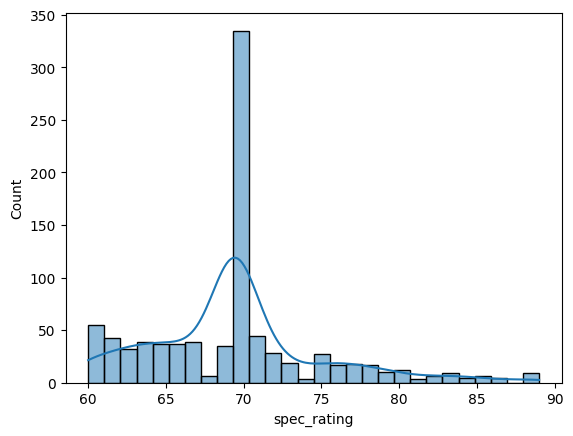

In [4172]:
sns.histplot(df['spec_rating'],kde=True)
plt.show()

In [4173]:
df['spec_rating'] = pd.qcut(df['spec_rating'], q=4)
df.head()


,spec_rating,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version,generation,CPU_Manufacturer,suffix_group,Scaled_Cores,Scaled_threads
0,"(71.0, 89.0]",0.625000,0.333333,9,-0.454550,2.0,5.0,4.0,1.0,0.116121,4,0,0,11,5,0,6.0,-0.313964,0.000000
1,"(59.999, 66.0]",0.625000,0.333333,9,-0.826656,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,12,2,0.0,-0.313964,-0.539176
2,"(66.0, 69.324]",0.375000,0.333333,1,-1.477061,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,11,2,12.0,-1.512942,-1.219372
3,"(59.999, 66.0]",0.375000,0.333333,14,-0.155400,4.0,6.0,4.0,1.0,0.235154,0,3,0,11,12,2,7.0,0.442507,0.460824
4,"(66.0, 69.324]",0.265625,0.333333,2,0.108374,2.0,5.0,3.0,1.0,0.309590,0,1,1,1,1,1,12.0,0.000000,-2.319952


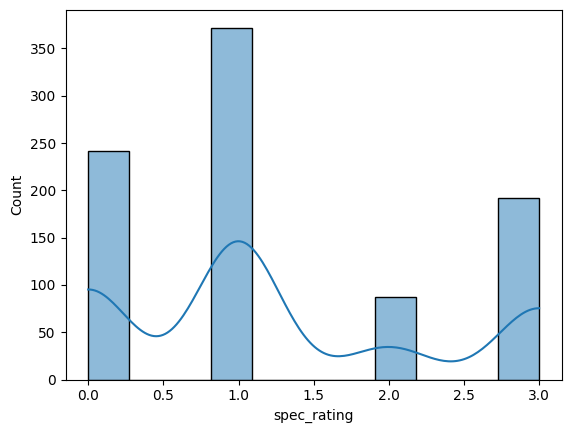

In [4174]:
df['spec_rating'] = df['spec_rating'].astype("string")
interval_order = ['(59.999, 66.0]','(66.0, 69.324]','(69.324, 71.0]','(71.0, 89.0]']
encoder = OrdinalEncoder(categories=[interval_order])
df['spec_rating'] = encoder.fit_transform(df[['spec_rating']])
sns.histplot(df['spec_rating'],kde=True)
plt.show()

In [4175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   spec_rating               893 non-null    float64
 1   display_size              893 non-null    float64
 2   warranty                  893 non-null    float64
 3   Laptop_Brand              893 non-null    int64  
 4   Scaled_Price              893 non-null    float64
 5   Encoded_Ram_Sizes         893 non-null    float64
 6   Encoded_Ram_Types         893 non-null    float64
 7   Encoded_Rom_Sizes         893 non-null    float64
 8   Encoded_Rom_Types         893 non-null    float64
 9   Aspect_Ratio              893 non-null    float64
 10  VRAM                      893 non-null    int32  
 11  Encoded_GPU_Manufacturer  893 non-null    int64  
 12  OS_Manufacturer           893 non-null    int64  
 13  OS_Version                893 non-null    object 
 14  generation

In [4176]:
df['OS_Version'] = df['OS_Version'].astype(np.int32)

In [4177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   spec_rating               893 non-null    float64
 1   display_size              893 non-null    float64
 2   warranty                  893 non-null    float64
 3   Laptop_Brand              893 non-null    int64  
 4   Scaled_Price              893 non-null    float64
 5   Encoded_Ram_Sizes         893 non-null    float64
 6   Encoded_Ram_Types         893 non-null    float64
 7   Encoded_Rom_Sizes         893 non-null    float64
 8   Encoded_Rom_Types         893 non-null    float64
 9   Aspect_Ratio              893 non-null    float64
 10  VRAM                      893 non-null    int32  
 11  Encoded_GPU_Manufacturer  893 non-null    int64  
 12  OS_Manufacturer           893 non-null    int64  
 13  OS_Version                893 non-null    int32  
 14  generation

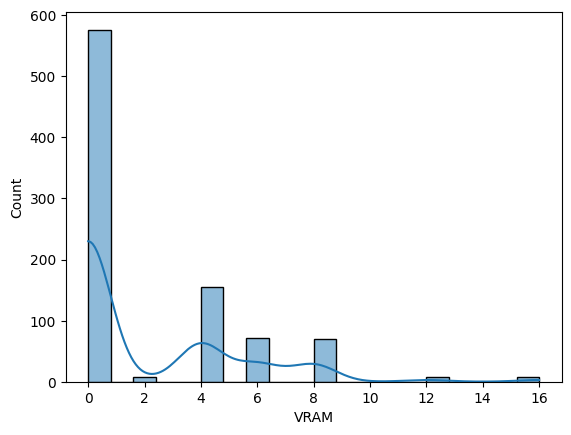

In [4178]:
sns.histplot(df['VRAM'],kde=True)
plt.show()

In [4179]:
# Define custom bin edges
bin_edges = [0, 2, 6, 10, np.inf]

# Define corresponding bin labels
bin_labels = ['0', '1', '2', '3']

# Apply custom binning
df['VRAM'] = pd.cut(df['VRAM'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df['VRAM'] = df['VRAM'].astype(np.int32)
df.head()

,spec_rating,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version,generation,CPU_Manufacturer,suffix_group,Scaled_Cores,Scaled_threads
0,3.0,0.625000,0.333333,9,-0.454550,2.0,5.0,4.0,1.0,0.116121,1,0,0,11,5,0,6.0,-0.313964,0.000000
1,0.0,0.625000,0.333333,9,-0.826656,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,12,2,0.0,-0.313964,-0.539176
2,1.0,0.375000,0.333333,1,-1.477061,2.0,5.0,4.0,1.0,0.116121,0,3,0,11,11,2,12.0,-1.512942,-1.219372
3,0.0,0.375000,0.333333,14,-0.155400,4.0,6.0,4.0,1.0,0.235154,0,3,0,11,12,2,7.0,0.442507,0.460824
4,1.0,0.265625,0.333333,2,0.108374,2.0,5.0,3.0,1.0,0.309590,0,1,1,1,1,1,12.0,0.000000,-2.319952


In [4180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   spec_rating               893 non-null    float64
 1   display_size              893 non-null    float64
 2   warranty                  893 non-null    float64
 3   Laptop_Brand              893 non-null    int64  
 4   Scaled_Price              893 non-null    float64
 5   Encoded_Ram_Sizes         893 non-null    float64
 6   Encoded_Ram_Types         893 non-null    float64
 7   Encoded_Rom_Sizes         893 non-null    float64
 8   Encoded_Rom_Types         893 non-null    float64
 9   Aspect_Ratio              893 non-null    float64
 10  VRAM                      893 non-null    int32  
 11  Encoded_GPU_Manufacturer  893 non-null    int64  
 12  OS_Manufacturer           893 non-null    int64  
 13  OS_Version                893 non-null    int32  
 14  generation

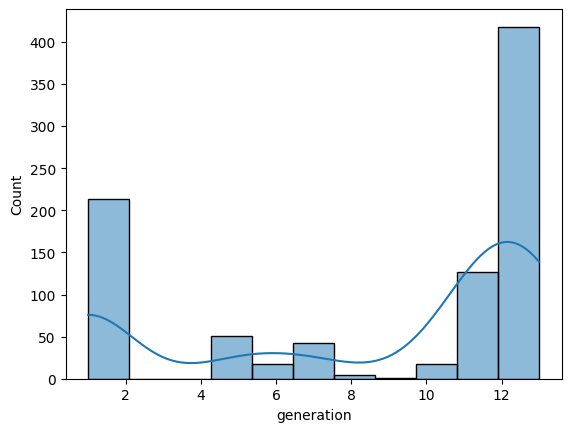

In [4181]:
sns.histplot(df['generation'],kde=True)
plt.show()

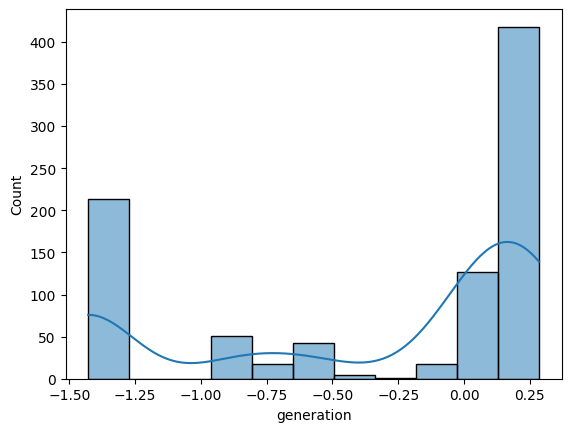

In [4182]:
df['generation'] = scaler.fit_transform(df[['generation']])
sns.histplot(df['generation'],kde=True)
plt.show()

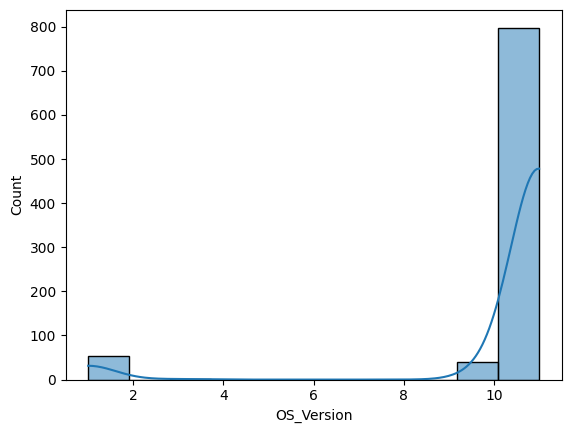

In [4183]:
sns.histplot(df['OS_Version'],kde=True)
plt.show()

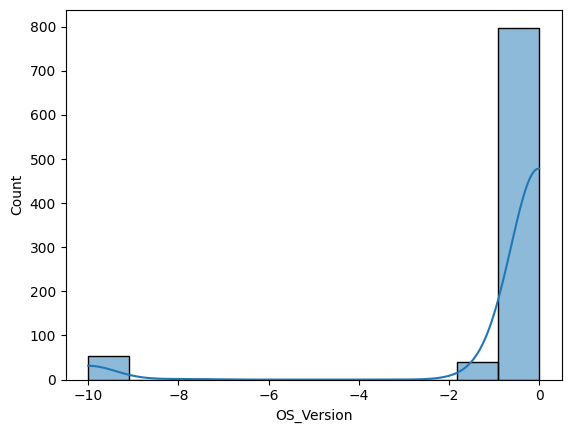

In [4184]:
df['OS_Version'] = scaler.fit_transform(df[['OS_Version']])
sns.histplot(df['OS_Version'],kde=True)
plt.show()

In [4185]:
df.head()

,spec_rating,display_size,warranty,Laptop_Brand,Scaled_Price,Encoded_Ram_Sizes,Encoded_Ram_Types,Encoded_Rom_Sizes,Encoded_Rom_Types,Aspect_Ratio,VRAM,Encoded_GPU_Manufacturer,OS_Manufacturer,OS_Version,generation,CPU_Manufacturer,suffix_group,Scaled_Cores,Scaled_threads
0,3.0,0.625000,0.333333,9,-0.454550,2.0,5.0,4.0,1.0,0.116121,1,0,0,0.0,-0.857143,0,6.0,-0.313964,0.000000
1,0.0,0.625000,0.333333,9,-0.826656,2.0,5.0,4.0,1.0,0.116121,0,3,0,0.0,0.142857,2,0.0,-0.313964,-0.539176
2,1.0,0.375000,0.333333,1,-1.477061,2.0,5.0,4.0,1.0,0.116121,0,3,0,0.0,0.000000,2,12.0,-1.512942,-1.219372
3,0.0,0.375000,0.333333,14,-0.155400,4.0,6.0,4.0,1.0,0.235154,0,3,0,0.0,0.142857,2,7.0,0.442507,0.460824
4,1.0,0.265625,0.333333,2,0.108374,2.0,5.0,3.0,1.0,0.309590,0,1,1,-10.0,-1.428571,1,12.0,0.000000,-2.319952
